In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
df = pd.read_csv("Google_Stock_Price_Train.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [4]:
train = df.iloc[:,1:2].values
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [5]:
# feature scaling
sc = MinMaxScaler(feature_range = (0,1))
train_sc = sc.fit_transform(train)
train_sc

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [6]:
# creating data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train_sc[i-60:i, 0])
    y_train.append(train_sc[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# initialize the RNN
regressor = Sequential()

In [8]:
# adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
# adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [10]:
# adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [11]:
# adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [12]:
# adding the output layer
regressor.add(Dense(units=1))

In [13]:
# compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# fitting the RNN to the train set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 21s 18ms/step - loss: 0.0463
Epoch 2/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0065
Epoch 4/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0047
Epoch 9/100
1198/1198 [==============================] - 13s 10ms/step - loss: 0.0049
Epoch 10/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0043
Epoch 11/100
1198/1198 [==============================] - 13s 10ms/step - loss: 0.0041
Epoc

1198/1198 [==============================] - 14s 11ms/step - loss: 0.0016
Epoch 93/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0017
Epoch 94/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0015
Epoch 95/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0016
Epoch 96/100
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0018
Epoch 99/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0015


In [22]:
df_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = df_test.iloc[:,1:2].values

In [23]:
# getting the predicted stock price of 2017
df_all = pd.concat((df["Open"], df_test["Open"]), axis=0)
inputs = df_all[len(df_all) - len(df_test) - 60 :].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

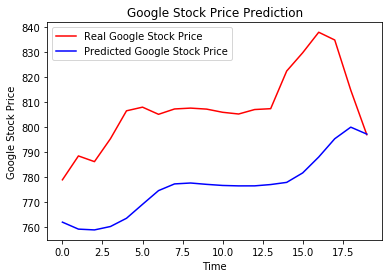

In [24]:
# visualize the results of precicted and real stock price
plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()